## 13장. Model Libary : statsmodels, scikit-learn

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', palette="pastel")

In [2]:
df = pd.read_csv('examples/chp13_data.csv')
df

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.01,1.3
4,5,0.00,-2.0


In [3]:
df2 = df.copy()
df2['strings'] = ['a', 'b', 'c', 'd', 'e']

df2

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.01,1.3,d
4,5,0.00,-2.0,e


In [5]:
## 특정 부분만 지정하여 추출할 때 
df2.loc[1:3, ['x1', 'y'] ].values

array([[-0.01,  0.  ],
       [ 0.25,  3.6 ],
       [-4.01,  1.3 ]])

In [8]:
#### strings 부분을 category 타입으로 변환하고, 더미변수로 재 생성 하기 
df2['strings'] = df2['strings'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
x0         5 non-null int64
x1         5 non-null float64
y          5 non-null float64
strings    5 non-null category
dtypes: category(1), float64(2), int64(1)
memory usage: 453.0 bytes


In [11]:
dummies = pd.get_dummies(df2['strings'], prefix = 'dummy')
df_with_dummies = df2.drop('strings', axis=1).join(dummies)
df_with_dummies

,x0,x1,y,dummy_a,dummy_b,dummy_c,dummy_d,dummy_e
0,1,0.01,-1.5,1,0,0,0,0
1,2,-0.01,0.0,0,1,0,0,0
2,3,0.25,3.6,0,0,1,0,0
3,4,-4.01,1.3,0,0,0,1,0
4,5,0.00,-2.0,0,0,0,0,1


### 1. statsmodels 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
#### statsmodels는 api로 가져온다. 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
def dnorm(mean, var, size = 1): 
    if isinstance(size, int): 
        size = size, 
    return mean + np.sqrt(var)*np.random.randn(*size)

In [7]:
#### 변수 x, y를 생성 
n = 100
x = np.c_[dnorm(0, 0.2, size = n), 
          dnorm(0, 0.4, size = n), 
          dnorm(0, 0.6, size = n), ]
eps = dnorm(0, 0.1, size = n)
beta = [0.1, 0.3, 0.5]

y = np.dot(x, beta) + eps

In [11]:
print(x[:5])
print('-------------------------')
print(y[:5])

[[ 0.56666042  0.24817817  0.47795139]
 [-0.31954901 -0.47187695  1.17896303]
 [-1.01295092  0.46361527 -1.15889529]
 [-0.12938999  0.52157261 -0.08240134]
 [-0.1182062  -0.0116809  -0.90360755]]
-------------------------
[-0.45759642  0.11713724 -0.93615011 -0.42185536 -0.59931359]


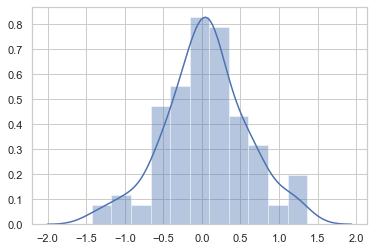

In [20]:
sns.distplot(y)

In [22]:
#### 최소자승 모델(OLS) 생성하고, fitting 
model = sm.OLS(y, x)
result = model.fit()

In [23]:
#### 모델 피팅결과 확인 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.599
Model:                            OLS   Adj. R-squared (uncentered):              0.587
Method:                 Least Squares   F-statistic:                              48.37
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                    3.33e-19
Time:                        17:44:29   Log-Likelihood:                         -34.301
No. Observations:                 100   AIC:                                      74.60
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0972      0.086      1.136      0.259      -0.073       0.267
x2             0.2204      0.062      3.567      0.001       0.098       0.343
x3             0.4640      0.039     11.944      0.000       0.387       0.541
==============================================================================
Omnibus:                        3.224   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.161
Skew:                          -0.386   Prob(JB):                        0.206
Kurtosis:                       2.598   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2. scikit-learn

In [26]:
#### 타이타닉 데이터의 나이&성별을 기준으로 생존예측 모델을 만들어 보자 
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

In [29]:
#### 먼저 결측치를 확인하고 처리해줘야 한다. 
print(train.isnull().sum())
print('------------------------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [30]:
#### 결측치를 median으로 대체하였다. 
impute_value_train = train['Age'].median()
impute_value_test = test['Age'].median()

train['Age'] = train['Age'].fillna(impute_value_train)
test['Age'] = test['Age'].fillna(impute_value_test)

In [31]:
#### 모델링을 위해 Sex를 isFemale(1과 0으로 구성) 변수로 변환 
train['isFemale'] = (train['Sex'] == 'female').astype(int)
test['isFemale'] = (test['Sex'] == 'female').astype(int)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [33]:
#### 예측에 사용할 변수들을 지정 
predictors = ['Age', 'isFemale', 'Pclass']

In [34]:
x_train = train[predictors].values
x_test = test[predictors].values
y_train = train['Survived'].values

In [36]:
#### 로지스틱 모형 선택 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [40]:
#### training set에 모델 피팅 
model.fit(x_train, y_train)

C:\Users\youngboo.choi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#### model.predict로 test 데이터셋에 적용 
survived_predict = model.predict(x_test)
survived_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,